# Used cars price prediction
### Authored by Ahmad Zalmout


## Abstract

In this document, a dataset of used cars was used to predict the selling price of the car based on a selection of features, for instance, number of seats, distance travelled, engine size, and so on. <br>
The dataset was collected from [Used Car Price Dataset](https://www.kaggle.com/datasets/rishabhkarn/used-car-dataset). The collection of the dataset is not clearly stated however, after some heavy research it was concluded that the data might be collected from an Indian cars selling [website](https://www.cardekho.com/). <br>

The reasons being the following:
1. The presense of a column "Price(in lakhs)" and that is an indian numbering system used to refer to large amounts and is usually related to the currency Rupees.
2. Everytime a car in the dataset is searched online, it is found in this website mentioned having almost all the features present in the dataset.
<br>

In the document, regression models were used for predicting the price (in euro) after some heavy data cleaning.

## Introduction

This document is intended as a project for a Data Science student to practice some data exploration techniques and the use of limited knowledge in ML models to try to predict prices of used cars as acurate as possible.<br>
In this exercise, a number of ML regression models were used to examine which would produce better results than the other.<br>
The models were exposed to tuning in order to achieve the required results.

## Data Preprocessing

To work with ML models, a few steps are needed to prepare the data for prediction.
The techniques used in this project are the following:

1. Removing Redundant columns.
2. Renaming misleading column name.
3. Checking and removing "NA" values.
4. Checking and removing duplicate values.
5. Checking data consistency across each column.
    1. Making sure categorical columns contain only categories.
    2. Making sure numerical columns contain reasonable ranges of values.
6. Exploratory data analysis.

In [47]:
# Importing needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import category_encoders as ce
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

In [2]:
# Reading the CSV file into a dataframe

df = pd.read_csv("Used Car Dataset.csv")
df

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,1548,2020 Hyundai Creta SX Opt Diesel AT BSVI,Aug-20,Comprehensive,Diesel,5,35000,First Owner,Automatic,2020,1493.00,11345.0,11345.0,250.0,17.41
1549,1549,2022 Renault KWID 1.0 RXL Opt BSVI,2022,Third Party insurance,Petrol,5,10000,999 cc,2022,Power Steering,999.00,6706.0,6706.0,91.0,3.98
1550,1550,2017 Honda WR-V i-VTEC S,Jun-17,Comprehensive,Petrol,5,49000,First Owner,Manual,2017,17.50,1199.0,1199.0,887.0,5.85
1551,1551,2018 Volkswagen Polo 1.0 MPI Comfortline,May-18,Comprehensive,Petrol,5,40000,Second Owner,Manual,2018,18.78,999.0,999.0,75.0,4.75


#### Removing Redundant columns and renaming misleading column name.

In [3]:
# Removing unnamed column as dataframe already has an index column
df.drop(columns = 'Unnamed: 0', inplace = True)

# removing column max_power(bhp) as it is a duplicate from column engine(cc)
df.drop(columns = 'max_power(bhp)', axis = 1, inplace = True)

# Renaming column
df = df.rename(columns={'ownsership': 'ownership'})

In [4]:
# Showing information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1553 non-null   object 
 1   registration_year   1553 non-null   object 
 2   insurance_validity  1553 non-null   object 
 3   fuel_type           1553 non-null   object 
 4   seats               1553 non-null   int64  
 5   kms_driven          1553 non-null   int64  
 6   ownership           1553 non-null   object 
 7   transmission        1553 non-null   object 
 8   manufacturing_year  1553 non-null   object 
 9   mileage(kmpl)       1550 non-null   float64
 10  engine(cc)          1550 non-null   float64
 11  torque(Nm)          1549 non-null   float64
 12  price(in lakhs)     1553 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 157.9+ KB


#### Checking and removing "NA" values.

It seams that there are missing data in the columns: mileage(kmpl), engine(cc), max_power(bhp), torque(Nm)

In [5]:
# Calculating sum of na values if any
df['mileage(kmpl)'].isna().sum()

3

In [6]:
# Removing na values
df.dropna(inplace = True)

In [7]:
# making sure na values are removed from all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1549 entries, 0 to 1552
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1549 non-null   object 
 1   registration_year   1549 non-null   object 
 2   insurance_validity  1549 non-null   object 
 3   fuel_type           1549 non-null   object 
 4   seats               1549 non-null   int64  
 5   kms_driven          1549 non-null   int64  
 6   ownership           1549 non-null   object 
 7   transmission        1549 non-null   object 
 8   manufacturing_year  1549 non-null   object 
 9   mileage(kmpl)       1549 non-null   float64
 10  engine(cc)          1549 non-null   float64
 11  torque(Nm)          1549 non-null   float64
 12  price(in lakhs)     1549 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 169.4+ KB


#### Checking and removing duplicate values.

In [8]:
# Checking for duplicates
df.duplicated().sum()

419

In [9]:
# Removing duplicates
df = df.loc[~df.duplicated()].reset_index(drop = True)

In [10]:
# Checking number of rows in each column after removing duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1130 non-null   object 
 1   registration_year   1130 non-null   object 
 2   insurance_validity  1130 non-null   object 
 3   fuel_type           1130 non-null   object 
 4   seats               1130 non-null   int64  
 5   kms_driven          1130 non-null   int64  
 6   ownership           1130 non-null   object 
 7   transmission        1130 non-null   object 
 8   manufacturing_year  1130 non-null   object 
 9   mileage(kmpl)       1130 non-null   float64
 10  engine(cc)          1130 non-null   float64
 11  torque(Nm)          1130 non-null   float64
 12  price(in lakhs)     1130 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 114.9+ KB


#### Checking data consistency across each column.
    - Making sure categorical columns contain only categories.
    - Making sure numerical columns contain reasonable ranges of values.

In [11]:
# Displaying uniques values with thier count in column ownership.
df['ownership'].value_counts()

ownership
First Owner     919
Second Owner    167
Third Owner      18
1995 cc           5
998 cc            2
999 cc            2
1498 cc           2
Fifth Owner       1
2999 cc           1
1984 cc           1
1197 cc           1
1248 cc           1
1199 cc           1
1996 cc           1
2013              1
1950 cc           1
1497 cc           1
1998 cc           1
1451 cc           1
1461 cc           1
2993 cc           1
1968 cc           1
Name: count, dtype: int64

It apears to be there are misleading values. It might be misplacement error, but since they are low in number they will be removed.

In [12]:
# Removing misleading values.
garbage_data = df[df['ownership'].str.contains('^(1|2|9)')].index.to_list()
df.drop(garbage_data, inplace = True)
df.reset_index(drop = True, inplace = True)

C:\Users\ahmad\AppData\Local\Temp\ipykernel_8544\1774476853.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  garbage_data = df[df['ownership'].str.contains('^(1|2|9)')].index.to_list()


In [13]:
# Making sure changes took place.
df['ownership'].value_counts()

ownership
First Owner     919
Second Owner    167
Third Owner      18
Fifth Owner       1
Name: count, dtype: int64

In [14]:
# Displaying unique values with thier count in  column transmission.
df['transmission'].value_counts()

transmission
Manual       644
Automatic    461
Name: count, dtype: int64

This column looks clean

In [15]:
# Displaying unique values with their count in  column manufacturing year.
df['manufacturing_year'].value_counts()

manufacturing_year
2018    172
2017    134
2019    133
2016    101
2015     98
2020     94
2021     88
2014     79
2022     65
2013     40
2012     35
2023     22
2011     19
2010     15
2009      9
2007      1
Name: count, dtype: int64

This column is clean

In [16]:
# Displaying unique values with their count in column seats.
df['seats'].value_counts()

seats
5    973
7    106
4     14
6     10
8      2
Name: count, dtype: int64

This column is clean

In [17]:
# Displaying unique values with their count in column fuel type.
df['fuel_type'].value_counts()

fuel_type
Petrol    738
Diesel    350
CNG        17
Name: count, dtype: int64

This column is clean

In [18]:
# Displaying unique values with thier count in column insurance validity.
df['insurance_validity'].value_counts()

insurance_validity
Comprehensive            788
Third Party insurance    209
Third Party               56
Zero Dep                  51
Not Available              1
Name: count, dtype: int64

In [19]:
# Fixing labeling error
df['insurance_validity'][df['insurance_validity'] == "Third Party insurance"] = "Third Party"

# Removing "Not available" row
df.drop(index = df[df['insurance_validity'] == 'Not Available'].index, inplace = True)
df.reset_index(drop = True, inplace = True)

C:\Users\ahmad\AppData\Local\Temp\ipykernel_8544\1205596396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['insurance_validity'][df['insurance_validity'] == "Third Party insurance"] = "Third Party"


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1104 non-null   object 
 1   registration_year   1104 non-null   object 
 2   insurance_validity  1104 non-null   object 
 3   fuel_type           1104 non-null   object 
 4   seats               1104 non-null   int64  
 5   kms_driven          1104 non-null   int64  
 6   ownership           1104 non-null   object 
 7   transmission        1104 non-null   object 
 8   manufacturing_year  1104 non-null   object 
 9   mileage(kmpl)       1104 non-null   float64
 10  engine(cc)          1104 non-null   float64
 11  torque(Nm)          1104 non-null   float64
 12  price(in lakhs)     1104 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 112.3+ KB


Data set looks good so far

In [21]:
df.describe()

,seats,kms_driven,mileage(kmpl),engine(cc),torque(Nm),price(in lakhs)
count,1104.000000,1104.000000,1104.000000,1.104000e+03,1.104000e+03,1104.000000
mean,5.193841,53281.646739,190.757627,1.180817e+10,1.341639e+04,163.163207
std,0.620384,43351.243256,515.267289,1.958801e+11,8.617023e+04,3549.435857
min,4.000000,620.000000,7.810000,6.700000e+01,1.900000e+01,1.000000
25%,5.000000,30000.000000,16.500000,1.197000e+03,5.075000e+02,4.500000
50%,5.000000,49000.000000,18.900000,1.461000e+03,1.213000e+03,6.750000
75%,5.000000,70000.000000,21.900000,1.991000e+03,8.855750e+03,14.257500
max,8.000000,810000.000000,3996.000000,3.258640e+12,1.186600e+06,95000.000000


As shown above, there are a lot of values that are out of context, for instance, the max value of the column engine is 3.258640e+12, aLso, torque values are extremely high.

When it comes to the price, it might be confusing for some as it is in lakhs, which is in indian numbering system which translates to 100,000. And as mentioned earlier usually this is associated with the currency Rupees. On the other hand, a car cannot possibly cost 9,500,000,000 Rupees or 104,569,248.82 Euros! Especially after inspecting it which turned out to be a really humble car.

In addition, the mean in all the above columns except of "seats" is much higher than the median. Suggesting positive sknewness. 

In [22]:
# Displaying the values in the data set sorted accourding to the price
df[['car_name', 'price(in lakhs)']].sort_values(by = 'price(in lakhs)', ascending = False)

,car_name,price(in lakhs)
843,2009 Maruti Alto 800 LXi,95000.00
111,2011 Ford Figo Petrol EXI,70000.00
1052,2019 BMW X7 xDrive 40i M Sport,99.00
284,2020 BMW X7 xDrive30d DPE Signature,98.50
136,2016 Mercedes-Benz S-Class Maybach S500,98.50
...,...,...
238,2019 Land Rover Range Rover Sport 2.0 Petrol SE,1.10
269,2018 Mercedes-Benz S-Class Maybach S500,1.09
531,2021 Mercedes-Benz GLS 400d 4MATIC BSVI,1.06
862,2019 Porsche Cayenne Base,1.05


The "price(in lakhs)" column have extremely large values. But it turns out that only 2 entries are misleading, and only needed lowering the number of extra zeros. 

This was double checked from the [website](https://www.cardekho.com/) the data is taken from.

In [23]:
# Reducing the number of zeros for the 2 entries as they are recorded incorrectly.
df['price(in lakhs)'] = df['price(in lakhs)'].apply(lambda x: x/10000 if x > 1000 else x)

In [24]:
# Displaying the data set sorted accourding to the engine and mileage columns
df[['car_name', 'mileage(kmpl)', 'engine(cc)']].sort_values(by = ['engine(cc)', 'mileage(kmpl)'], ascending = False)

,car_name,mileage(kmpl),engine(cc)
272,2022 Mercedes-Benz GLS 400d 4MATIC,2925.0,3.258640e+12
425,2023 Mercedes-Benz GLS 400d 4MATIC BSVI,2925.0,3.258640e+12
531,2021 Mercedes-Benz GLS 400d 4MATIC BSVI,2925.0,3.258640e+12
1024,2020 Mercedes-Benz GLS 400d 4MATIC BSVI,2925.0,3.258640e+12
533,2015 Mercedes-Benz M-Class ML 350 4Matic,2987.0,1.652244e+09
...,...,...,...
988,2013 Hyundai Grand i10 Magna,1197.0,8.200000e+01
995,2017 Volkswagen Polo 1.2 MPI Trendline,1198.0,7.400000e+01
111,2011 Ford Figo Petrol EXI,1196.0,7.000000e+01
840,2015 Hyundai Grand i10 CRDi Magna,1120.0,7.000000e+01


The values in columns "engine(cc)" and "mileage(kmpl)" appear to be swapped. As it is impossible for a car to have mileage of 2925 and an engine capacity of 3.258640e+12. So the values of the engine column were double checked from the [website](https://www.cardekho.com/).

However, the actual values of the mileage coud not be obtained and it is dificult to reduce the digit count as it is unique to each car based on its usage.

In [25]:
# Swapping values between columns.
mask = df[df['mileage(kmpl)'] > 100].index
temp_values = df.loc[mask, ['mileage(kmpl)', 'engine(cc)']].copy()
df.loc[mask, 'engine(cc)'] = temp_values['mileage(kmpl)']
df.drop(columns = 'mileage(kmpl)', inplace = True)

In [26]:
# Displaying the values of torque that are inconsistant
df[['car_name', 'torque(Nm)']][df['torque(Nm)'] / 1000 > 1].sort_values(by = 'torque(Nm)', ascending = False)

,car_name,torque(Nm)
753,2011 Honda City 1.5 S MT,1186600.0
1063,2010 Honda City 1.5 V MT,1186600.0
543,2017 Honda City 1.5 V MT Exclusive,1186600.0
879,2011 Hyundai i20 1.4 CRDi Asta,904000.0
275,2012 Hyundai i20 Magna,805200.0
...,...,...
221,2017 Volkswagen Polo GT TSI Sport Edition,1035.0
716,2015 Volkswagen Vento 1.2 TSI Highline AT,1032.0
480,2019 Maruti XL6 Alpha,1032.0
609,2019 Maruti XL6 Alpha AT,1032.0


As you can see, these values are too large for torque. However after heavy inspection it was **not** found what those values represent. <br>
In addition, droping the values would result in a large lose of data. <br>
For this reason, it was a good choice to drop the column entirely.

In [27]:
# Droping column torque
df.drop(columns = 'torque(Nm)', inplace = True)

In [28]:
# Displaying values of registration year column.
df['registration_year'].sort_values()

810       2007
56        2009
911       2009
743       2009
678       2010
         ...  
1039    Sep-22
337     Sep-23
83      Sep-23
108     Sep-23
318     Sep-23
Name: registration_year, Length: 1104, dtype: object

As shown above, the column does not have consistent values. 
The month cannot be added for the rows that don't have them as this information was not found. 
Also, removing the months would result in redundant values as there exist a column with manufacturing year.

In [29]:
# Droping registration year coulmn.
df.drop(columns = 'registration_year', inplace = True)

The car prices are in Rupees Lakhs. As mentioned earlier, this translates to 100,000 Rupees. <br>
Thecode cell below converts the prices to Euro.

In [30]:
# Converting lakhs to euro
df['price(euro)'] = df['price(in lakhs)'] * 1100.73

#### Exploratory data analysis

A number of graphs were ploted to see the distribution of the data to understand and explain the results of the model.

Text(0, 0.5, 'Price (1000 euro)')

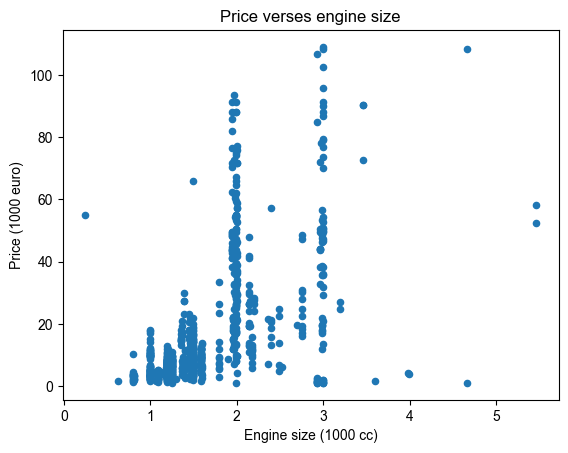

In [31]:
# Ploting price of cars against engine size
plt.scatter(df['engine(cc)'] / 1000, df['price(euro)'] / 1000, s = 20)
plt.style.use('seaborn-v0_8-dark')
plt.title("Price verses engine size")
plt.xlabel("Engine size (1000 cc)")
plt.ylabel('Price (1000 euro)')

The graph above shows that the distribution of engine size is concentrated in the range 1000 - 3000 cc. <br>
Price is spread on the whole spectrum.

As a general point of view, the larger the engine size, the higher the price gets. However, up to a 3000 cc some prices drop to the extremely low range. This seemed counter intuitive. <br>
As it turns out, the cars that are above 3000 and some times 2000 cc with prices in lakhs in the single digit value they are actually in crore and not lakh. This means the price is actually in 10,000,000 Rupees instead of 100,000. So after the conversion they turned out to be extrmely cheap while they belong to the luxurious category of vehicles.

All that being said, the problem cannot be solved easily as the not only the engine size and the price can determine this car is in lakh or crore, but also the manufacturer of the vehicle and some common sense. And this in python is not easily solved.

Text(0.5, 1.0, 'Box Plot of Manufacturing year')

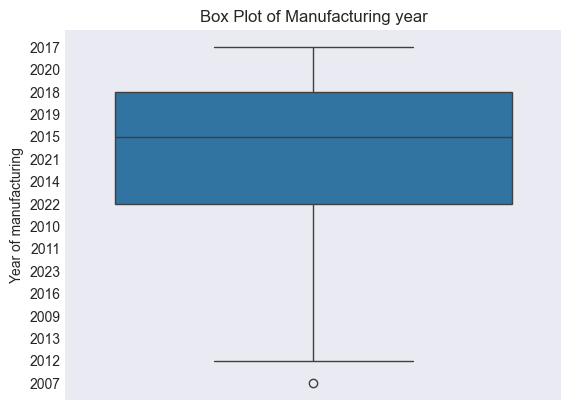

In [32]:
# Ploting manufacturing year.
sns.boxplot(df['manufacturing_year'])
sns.set_theme(style="whitegrid")
plt.ylabel("Year of manufacturing")
plt.title("Box Plot of Manufacturing year")

The box plot above displays the manufacturing year of the vehicles. <br>
It is noted that most of the cars are new as the data is positivly skewed in terms of manufacturing year. <br>
This might make the prediction to be closer to the price of new cars which in turn over estimate the price.

Text(0.5, 1.0, 'Box Plot of distance driven')

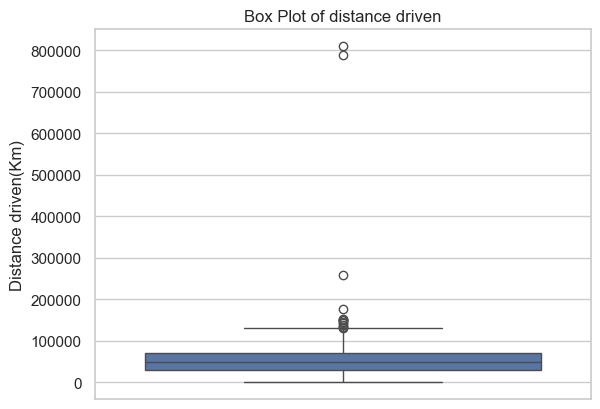

In [33]:
# Ploting distance driven.
sns.boxplot(df['kms_driven'])
plt.ylabel("Distance driven(Km)")
plt.title("Box Plot of distance driven")

Text(0.5, 1.0, 'Box Plot of engine capacity')

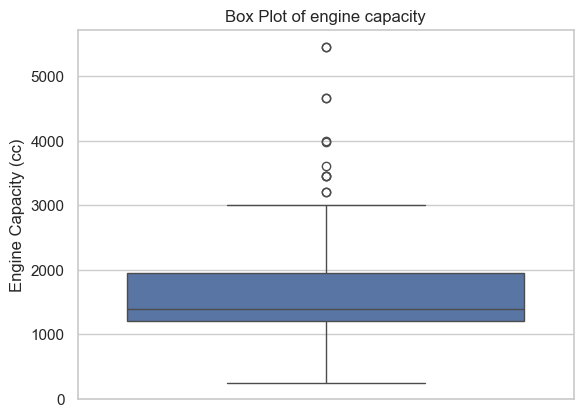

In [34]:
# Ploting the engine size.
sns.boxplot(df['engine(cc)'])
plt.ylabel("Engine Capacity (cc)")
plt.title("Box Plot of engine capacity")

Text(0.5, 1.0, 'Box Plot of vehicle price')

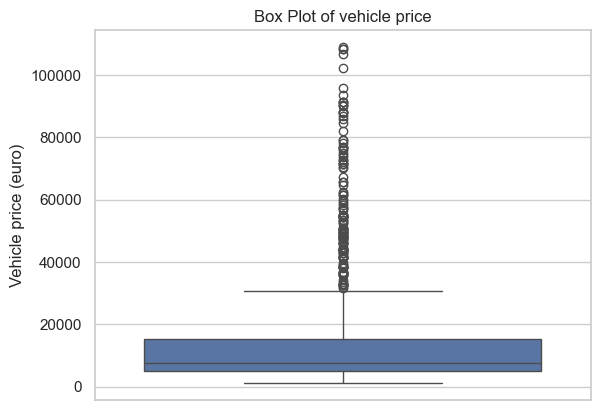

In [35]:
# Ploting prices.
sns.boxplot(df['price(euro)'])
plt.ylabel("Vehicle price (euro)")
plt.title("Box Plot of vehicle price")

In the above 3 plot above, it is noted that the data a lot of outliers. <br>
This have to be dealt with because it will affect the prediction.

In [36]:
# Removing outliers
min_threshold1, max_threshold1 = df['kms_driven'].quantile([0.001,0.999])
min_threshold2, max_threshold2 = df['engine(cc)'].quantile([0.001,0.999])
min_threshold3, max_threshold3 = df['price(euro)'].quantile([0.001,0.999])

df = df[(df['kms_driven']<max_threshold1)&(df['kms_driven']>=min_threshold1)]
df = df[(df['engine(cc)']<max_threshold2)&(df['engine(cc)']>=min_threshold2)]
df = df[(df['price(euro)']<max_threshold3)&(df['price(euro)']>=min_threshold3)]
df.reset_index(drop=True,inplace=True)

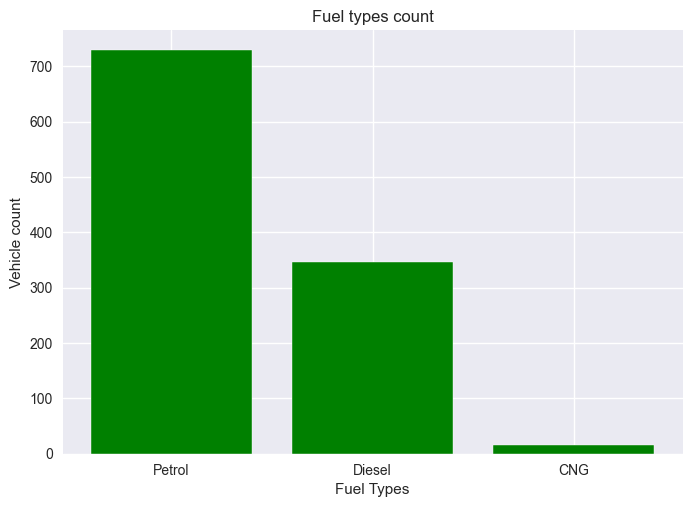

In [37]:
# Ploting the fuel type
plt.style.use('seaborn-v0_8')
plt.bar(df['fuel_type'].unique(), df['fuel_type'].value_counts(), color = 'green')
# plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.title('Fuel types count')
plt.xlabel('Fuel Types')
plt.ylabel('Vehicle count')
plt.show()

It is shown in the plot above that most of the data is _Petrol_. This might be a problem for later as the prediction will be biased to Petrol cars. <br> 
And equating the data accourding to fuel type is not possible as the CNG has very few entries. <br><br>
Note: CNG fuel is Compressed Natural Gas.

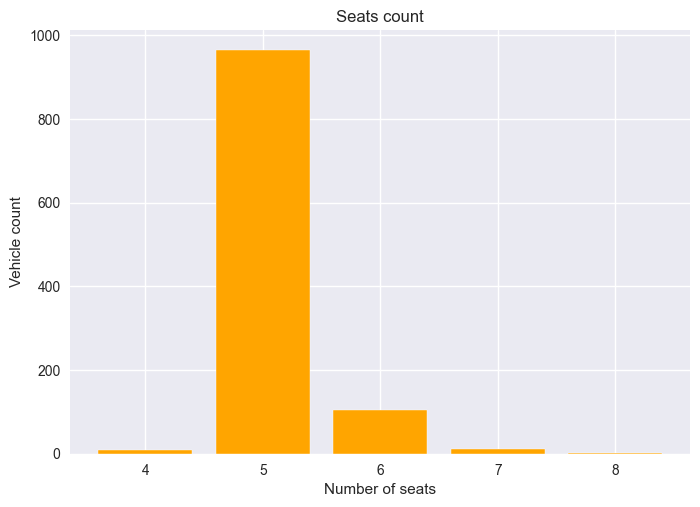

In [38]:
# Ploting number of seats.
plt.bar(df['seats'].unique(), df['seats'].value_counts(), color = 'orange')
plt.title('Seats count')
plt.xlabel('Number of seats')
plt.ylabel('Vehicle count')
plt.show()

In terms of seats, the majority of the data is 5 seats. This will cause a bias toward the 5 seater vehicles. 

In [48]:
# Ploting Ownership categories.
fig = go.Figure(data=[go.Pie(labels=df['ownership'].unique(), values=df['ownership'].value_counts())])

fig.update_layout(title_text='Ownership categories',
                  width=500,
                  height=400)
pyo.iplot(fig)

The majority of the ownership is first owner. And the fifth owner is barely visible. Resulting yet in another bias.

## Machine learning Models

Below is 3 regression models that are applied on the dataset for the purpose of predicting the price of a car based no the features explored earlier. <br>
The models are predicting the price in Euro.

In [40]:
# Preparing X and Y values
X = df.drop(columns=['price(in lakhs)', 'price(euro)', 'car_name'])
Y = df['price(euro)']

In [41]:
# Encoding categorical features using onehot encoder
encoder = ce.OneHotEncoder(cols=['insurance_validity', 'fuel_type', 'ownership', 'transmission'])
X_transformed = encoder.fit_transform(X)

# Standardizing the data
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X_transformed)
X_transformed = pd.DataFrame(X_transformed)


In [42]:
# selecting best featues that describe the data
k=8
selector = SelectKBest(f_regression,k=k)
selector.fit(X_transformed, Y)
best_feats = selector.get_support(indices=True)
xTrain_best = X_transformed.iloc[:,best_feats]

In [43]:
# Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(xTrain_best, Y, test_size=0.2, random_state=5)

In [44]:
# Applying a linear regression model

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Printing the actual and predicted values
print("Actual value", "         Predicted value\n")
i = 1
while i < 10:
    print(y_test.values[i],"            ", y_pred[i])  
    i += 1
print("-" *50)
print("Evaluation metrics: ")


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Actual value          Predicted value

12108.03              26519.71773353313
5228.4675              4083.761968235107
10952.2635              18781.608592849017
7143.737700000001              16168.844564365983
4524.000300000001              3289.5284661290516
9356.205              12198.303266300545
8255.475              14049.617737105054
4171.7667              1587.9186143222869
7374.8910000000005              11370.093954955022
--------------------------------------------------
Evaluation metrics: 
Mean Squared Error: 177542124.73445678
R-squared: 0.462117192665492


The MSE is extremely high. <br>
The R squared shows the prediction is weakly represented. <br>
And as expected, most of the predicted values are over estimated as stated above in the graph of manufacturing year.<br>
This means this model is not good. However, more than one option of choosing best features were chosen, outliers removed, data cleaned, and a number of variations of encoding was applied on the data. And still there were no significant imporovment.

This may lead to the conclusion that this model cannot be represented in linear model. A possible cause is the high number of categorical data.

In [45]:
# Applying a polynomial regression model
degrees = [1, 5, 10]
for i in degrees:
    poly_reg2=PolynomialFeatures(degree=i)

    # transforming feature X into X^2
    X_poly=poly_reg2.fit_transform(X_train)

    # creating a linear regression handler
    lin_reg_2=LinearRegression()

    # applying linear regression to the transformed X^2 space
    # this is equivalent to fitting a polynomial of degree 2 to the orginal X space
    lin_reg_2.fit(X_poly,y_train)
    y_pred2 = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred2)
    r2 = r2_score(y_test, y_pred2)
    print(f"Polynomial degree {i}:\n")

    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print("-" * 20)

Polynomial degree 1:

Mean Squared Error: 177542124.73445678
R-squared: 0.462117192665492
--------------------
Polynomial degree 5:

Mean Squared Error: 177542124.73445678
R-squared: 0.462117192665492
--------------------
Polynomial degree 10:

Mean Squared Error: 177542124.73445678
R-squared: 0.462117192665492
--------------------


Same exact numbers are obtained using polynomial regression. <br>
This might indicate that the data cannot be represented in higher degrees of polynomial regression.

A different model is applied below in an attempt to predict the prices more accurately.

In [46]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt


from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 10, 100, 1000],
              'gamma': ['auto', 0.1, 0.01, 0.001],
              'epsilon': [0.1, 0.5, 1, 2]}

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

best_svr = SVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], epsilon=best_params['epsilon'])
best_svr.fit(X_train, y_train)
y_pred3 = best_svr.predict(X_test)


mse = mean_squared_error(y_test, y_pred3)
print(f"Mean Squared Error (MSE): {mse}")

r2 = r2_score(y_test, y_pred3)
print(f"R-squared (R2): {r2}")

Best Parameters: {'C': 1000, 'epsilon': 2, 'gamma': 0.1}
Mean Squared Error (MSE): 175253949.4730392
R-squared (R2): 0.46904946372581335


The SVR (Support Vector Regression) with RBF kernel is used with different parameters. <br>
A grid search method was used to find the best parameters for the model and the same MSE and r squared were obtained. <br>
This indicates that even this algorithm cannot represent the data nor predict the price.

It is worth mentioning that due to this algorithm, the standard encoding was added. As it was adviced to standardise the data before a SVM (support Vector Machine) model is used for optimum results. And infact it did help, it raised the r sqaured from -0.16 to 0.37. However it remained a bad model for this data and cannot be counted on for price prediction accoring to this dataset.

## Conclusion

Despite the fact that 3 ML models were used on different parameters and degrees, it was not possible to come up with a model that predicts the price based on this dataset. because the MSE is very large and the r squared does not represent a strong relationship between the test set and the predicted set. <br>
This might be due to the following reasons:

1. Limited number of ML models were used.
    
    Although the dataset appears to be relatively large and having a large number of features, it was not suffiecent for the 3 regression models used above to make an acurate prediction. Perhaps if different models were used like KNN (K-Nearest Number) or Decision Tree were used, they might give better results.

2. Not enough Data Cleaning.

    Another possible senario is limited data cleaning techniques. This might be due to the limited time of the project to be finished or due to the limited experience of the implementer of the data cleaning techniques. <br>
    Despite that, substantial effort was put into cleaning the data as mentioned above in detail. The data is so bad that even the auther himself has questioned his dataset  and felt confused after being asked about the problems his data have. Considerable number of data analysts online critisized the dataset and even some of them tried cleaning it only to post the cleaned version. <br>

    As mentioned earlier, the dataset had so many problem including: 

    1. Swapped values.
    2. values recorded with much more digits and zeros than actual values.
    3. redundant columns.
    4. price unit is not accurate.
    5. filled with outliers.

    After all, those problems were solved before implementing any model and it was made sure the data is clean both statistically and logically. On the other hard, some problems were discovered at a later stage, for instance, the incorret price unit that was *crore* instead of *lakh*, this alone can cause severe problems as the car would be predicted to have high price value according to its features but when compared to the test set it would result in a big difference and thus cause high error value.

3. Categorical Features
    One possible cause is the presence of large number of categorical features especially after data cleaning. This resutls in a high number of columns being encoded and transformed and thus not giving a good representation on the data.

    
At the end, it is highly likely that the dataset is the main responsible of the high errors the models produced and the problem was not the tuning nor the data cleaning process. However, other possible explainations are possible.